# Explore here

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df = pd.read_csv(url)

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [14]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [15]:
print(df['sex'].unique()) 
print(df['smoker'].unique())

['female' 'male']
['yes' 'no']


In [16]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


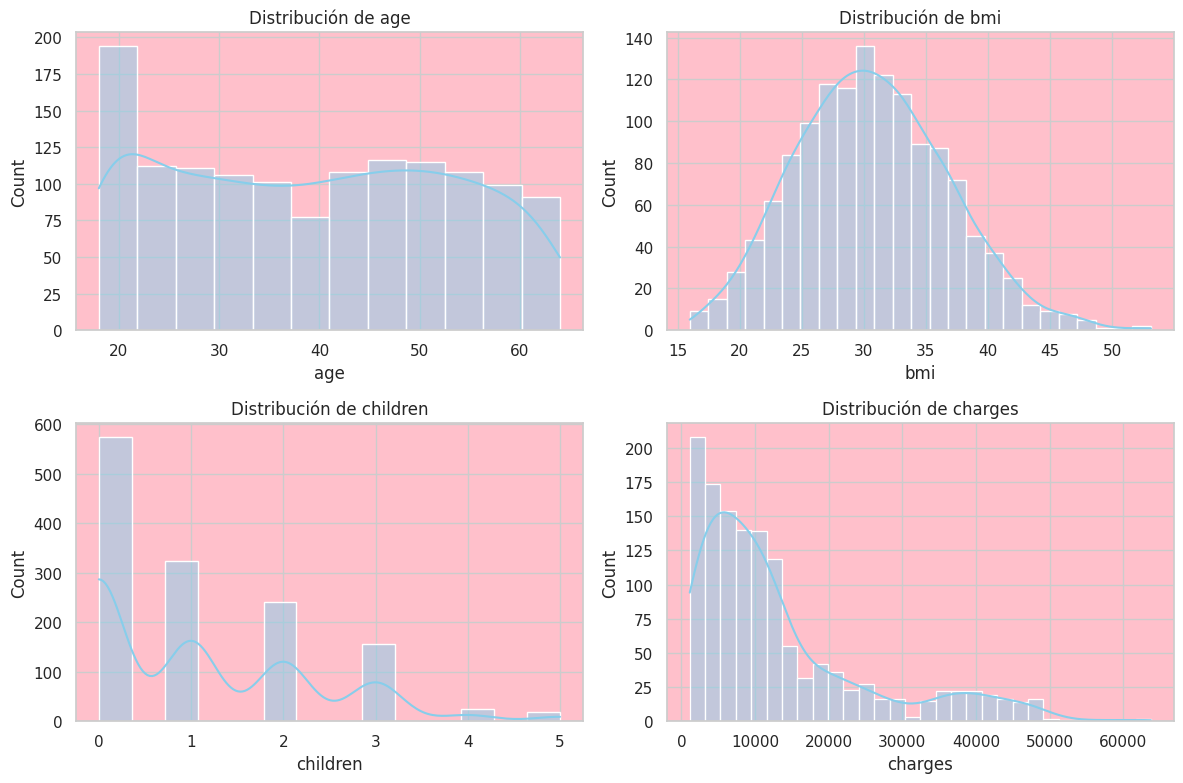

In [17]:
sns.set(style="whitegrid", rc={"axes.facecolor": "pink"})  # Cambiar fondo de todos los gráficos a rosa


numericas = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numericas):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

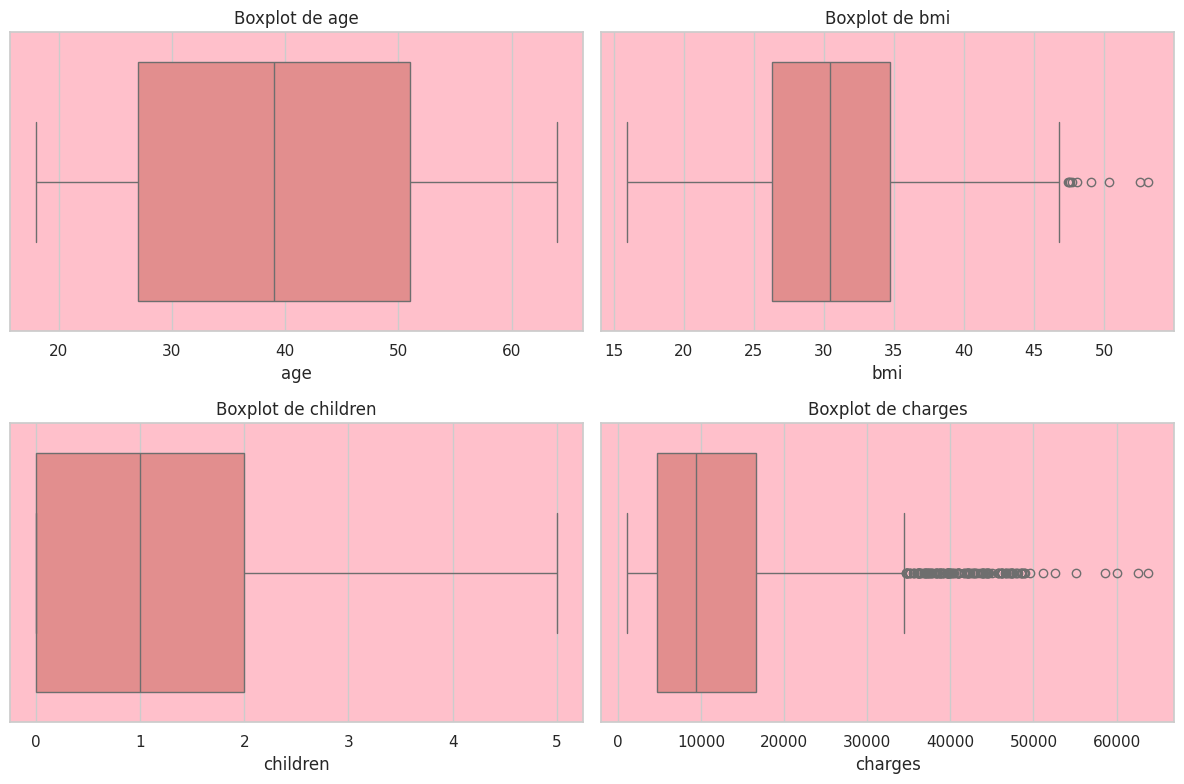

In [18]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numericas):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

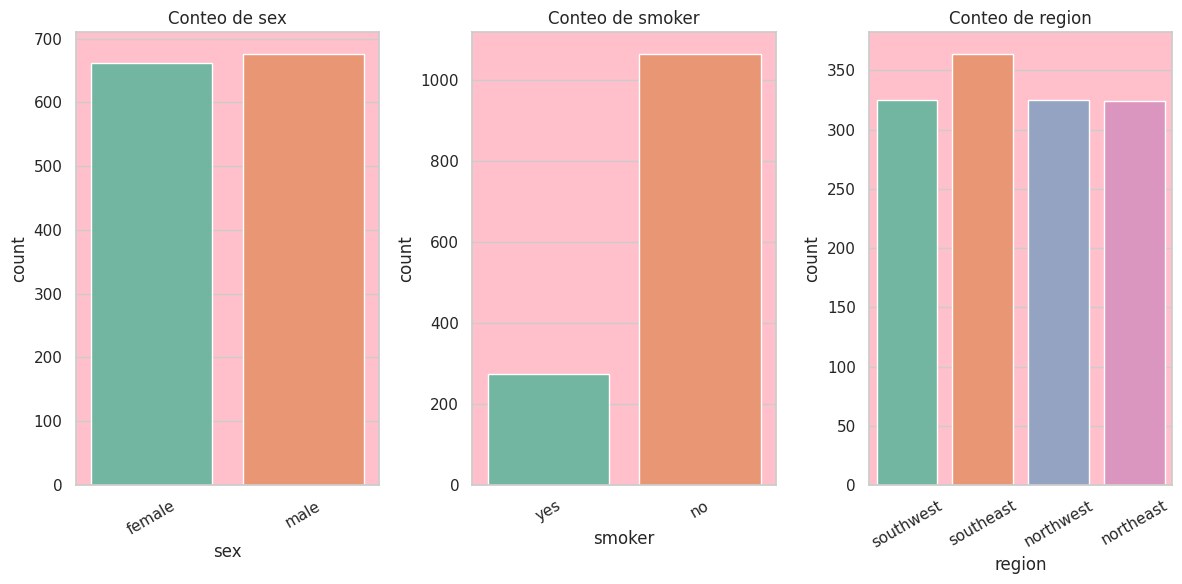

In [19]:
categoricas = ['sex', 'smoker', 'region']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categoricas):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
    plt.title(f'Conteo de {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

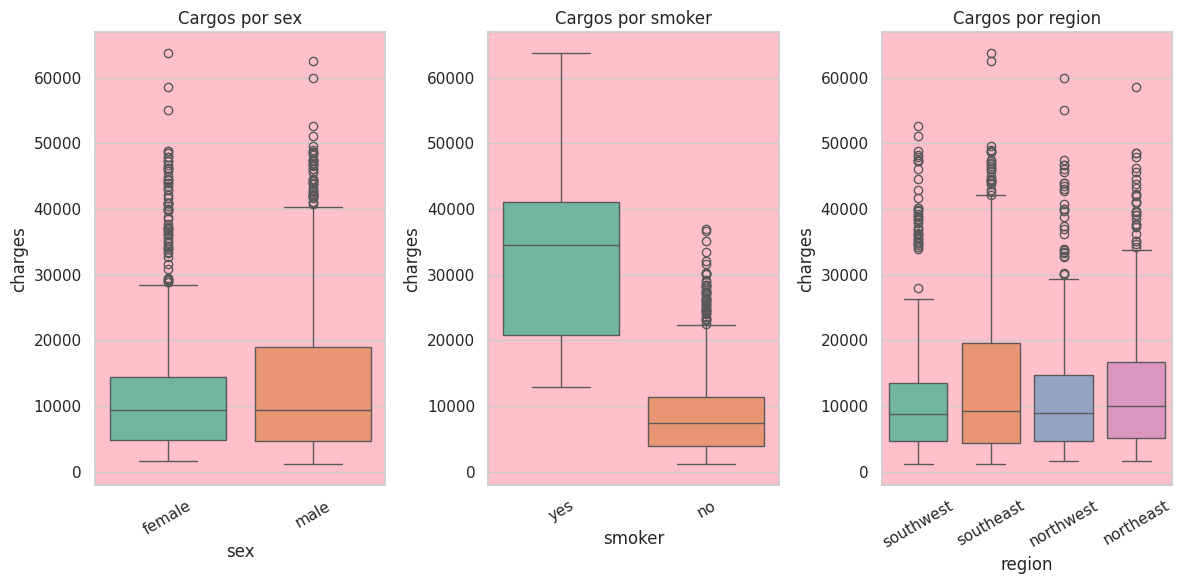

In [ ]:
# Definir el color de fondo
plt.figure(figsize=(12, 6))
for i, col in enumerate(categoricas):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=col, y='charges', data=df, hue=col, palette='Set2', legend=False)
    plt.title(f'Cargos por {col}')
    plt.xticks(rotation=30)
    
    # Cambiar el fondo del gráfico a rosa
    plt.gca().set_facecolor('pink')  # Cambiar fondo a rosa

plt.tight_layout()
plt.show()

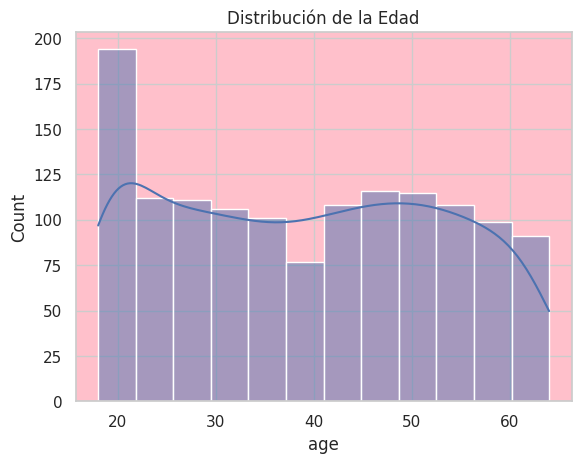

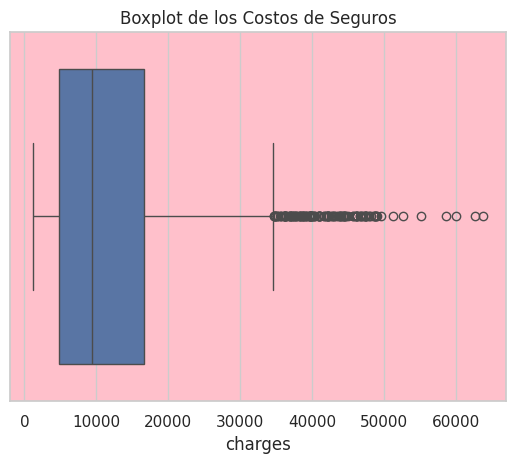

In [29]:

sns.histplot(df['age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

sns.boxplot(x=df['charges'])
plt.title('Boxplot de los Costos de Seguros')
plt.show()

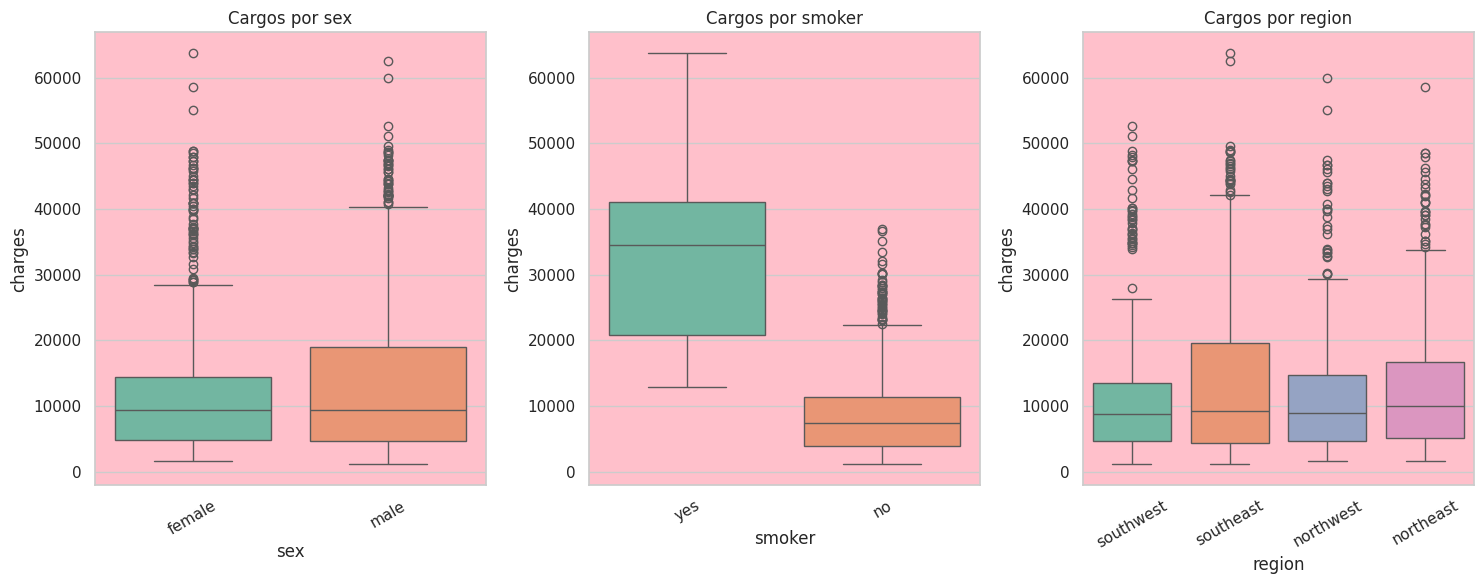

In [22]:
categoricas = ['sex', 'smoker', 'region']

plt.figure(figsize=(15, 6))
for i, col in enumerate(categoricas):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=col, y='charges', data=df, hue=col, palette='Set2', legend=False)  # ← Corrección
    plt.title(f'Cargos por {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


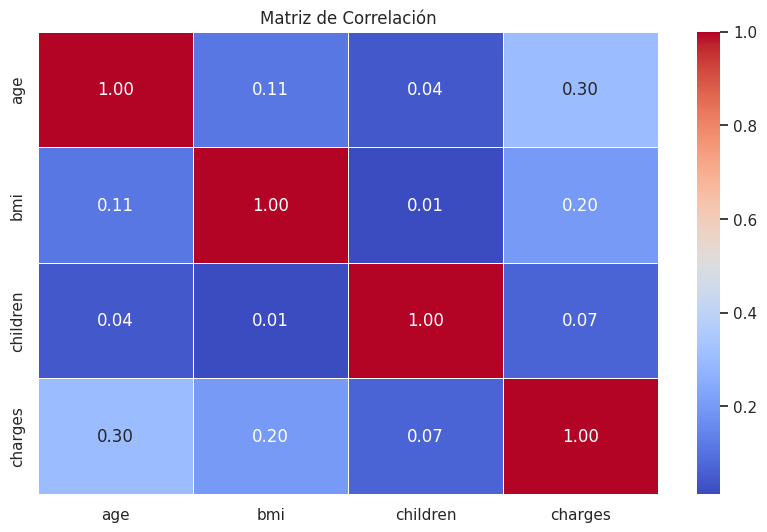

In [23]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

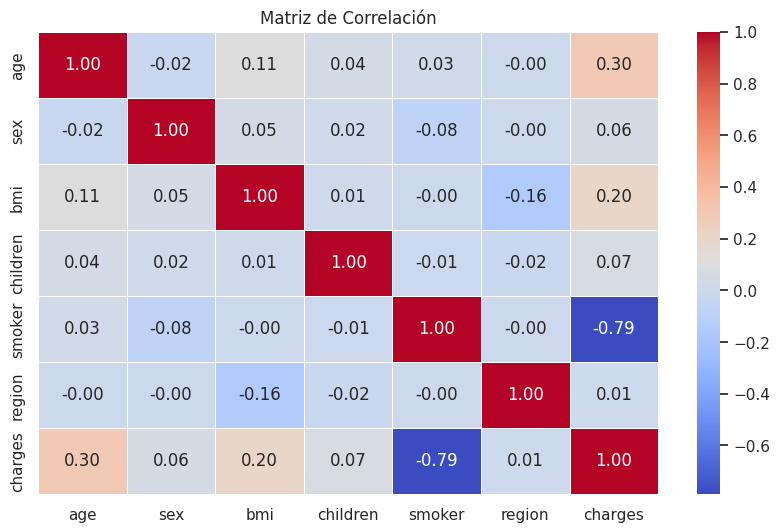

In [24]:
df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]  
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

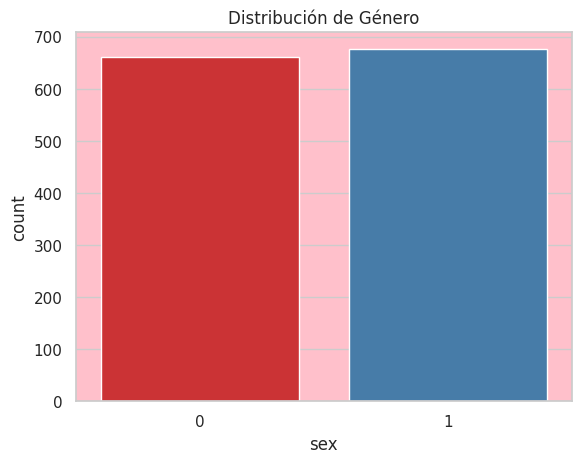

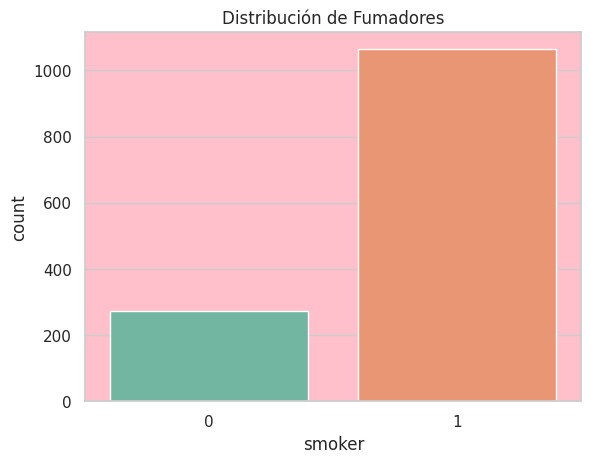

In [30]:
# Gráfico de barras para la variable 'sex'
sns.countplot(x='sex', data=df, hue='sex', palette='Set1', legend=False)
plt.title('Distribución de Género')
plt.show()

# Gráfico de barras para la variable 'smoker'
sns.countplot(x='smoker', data=df, hue='smoker', palette='Set2', legend=False)
plt.title('Distribución de Fumadores')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print("Train data:")
print(train_data.head())

print("\nTest data:")
print(test_data.head())

Train data:
      age  sex    bmi  children  smoker  region      charges
560    46    0  19.95         2       1       2   9193.83850
1285   47    0  24.32         0       1       3   8534.67180
1142   52    0  24.86         0       1       1  27117.99378
969    39    0  34.32         5       1       1   8596.82780
486    54    0  21.47         3       1       2  12475.35130

Test data:
      age  sex     bmi  children  smoker  region      charges
764    45    0  25.175         2       1       3   9095.06825
887    36    0  30.020         0       1       2   5272.17580
890    64    0  26.885         0       0       2  29330.98315
1293   46    1  25.745         3       1       2   9301.89355
259    19    1  31.920         0       0       2  33750.29180


In [27]:
X = df[['age', 'bmi', 'children']]  
y = df['charges']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 131201335.64669806
R^2 Score: 0.15489592484270753


In [33]:
print(df_encoded.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_1',
       'region_2', 'region_3'],
      dtype='object')
